# ***Homework B2 with Revision of Homework B1***

###**You must solve a binary classification problem with feedForward Neural Network.**

#### Eliminate from the analysis: education, native-country.
#### Combine occupation in only 5 categories
#### Divide into train 70% and validation 30%,  seed number 123
#### Apply a feedforward neural network with at least 4 layers. Use dropout if you have overfitting.
#### Look for the optimal hyperparameters for each model
#### Upload the notebook



In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *

import os
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.models import  Model
from tensorflow.keras.layers import  Input, Concatenate
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization

In [419]:
df = pd.read_csv('data1.csv',skipinitialspace=True, na_values='?')
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


# ***Data Description***

### **Listing of attributes:**

- `Target:` >50K, <=50K   (the last variable, indicates the income)

- `age:` continuous.

- `workclass:` Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

- `fnlwgt:` continuous.

- `education:` Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th,
Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

- `education-num:` continuous.

- `marital-status:` Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

- `occupation:` Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners,
Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

- `relationship:` Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

- `race:` White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

- `sex:` Female, Male.

- `capital-gain:` continuous.

- `capital-loss:` continuous.

- `hours-per-week:` continuous.

- `native-country:` United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc),
India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam,
Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary,
Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

#### **Categorical Features:**  
`native-country`, `sex`, `race`, `relationship`, `occupation`, `marital-status`, `education`, `workclass`, `Target`

#### **Continuous Features:**  
`hours-per-week`, `capital-loss`, `capital-gain`, `education-num`, `fnlwgt`, `age`



### **Eliminate from the analysis: education, native-country.**

In [420]:
df.drop(columns=["education","native-country"],inplace=True)
df.head(10)

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,target
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,<=50K
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,<=50K
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,<=50K
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,<=50K
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,<=50K
5,37,Private,284582,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,<=50K
6,49,Private,160187,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,<=50K
7,52,Self-emp-not-inc,209642,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,>50K
8,31,Private,45781,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,>50K
9,42,Private,159449,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,>50K


### **Data cleaning**

In [421]:
print("Checking dataframe missing values:\n")
for column in df.columns:
    if df[column].isnull().sum() != 0:
        missingValue = df[column].isnull().sum()
        percentage = missingValue / len(df[column]) * 100
        dtype = df[column].dtype
        print(f"The column: '{column}' with Data Type: '{dtype}' has missing value: {missingValue}, percentage: {percentage:.2f}%")


del missingValue
del percentage
del dtype

Checking dataframe missing values:

The column: 'workclass' with Data Type: 'object' has missing value: 1836, percentage: 5.64%
The column: 'occupation' with Data Type: 'object' has missing value: 1843, percentage: 5.66%


### **Combine occupation in only 5 categories**

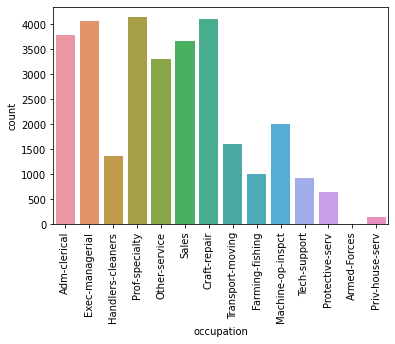

In [422]:
import seaborn as sns
categ = ["occupation"]
for nome in categ:
    ax = sns.countplot(x=nome, data=df,)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
    plt.show()

In [423]:
df['occupation'] = df['occupation'].fillna(0)
df.drop(df[df['occupation'] == 0].index, inplace = True)


encode_occupation = {'Other-service':"other-services",'Armed-Forces':"other-services",
                     'Farming-fishing':'manual-worker', 'Machine-op-inspct':'manual-worker','Craft-repair':'simple-job',
                     'Handlers-cleaners':'simple-job', 'Priv-house-serv':"simple-job", 'Protective-serv':"simple-job",
                     'Transport-moving':"medium-level-job", 'Adm-clerical':"medium-level-job",'Sales':"medium-level-job",
                     'Tech-support':"medium-level-job",'Exec-managerial':"professional",'Prof-specialty':"professional"}

recod = df['occupation'].map(encode_occupation)
df['occupation'] = recod.astype('str')

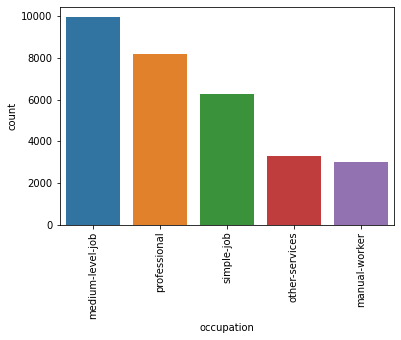

In [424]:
categ = ["occupation"]
for nome in categ:
    ax = sns.countplot(x=nome, data=df,)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
    plt.show()

In [425]:
df.head(10)

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,target
0,39,State-gov,77516,13,Never-married,medium-level-job,Not-in-family,White,Male,2174,0,40,<=50K
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,professional,Husband,White,Male,0,0,13,<=50K
2,38,Private,215646,9,Divorced,simple-job,Not-in-family,White,Male,0,0,40,<=50K
3,53,Private,234721,7,Married-civ-spouse,simple-job,Husband,Black,Male,0,0,40,<=50K
4,28,Private,338409,13,Married-civ-spouse,professional,Wife,Black,Female,0,0,40,<=50K
5,37,Private,284582,14,Married-civ-spouse,professional,Wife,White,Female,0,0,40,<=50K
6,49,Private,160187,5,Married-spouse-absent,other-services,Not-in-family,Black,Female,0,0,16,<=50K
7,52,Self-emp-not-inc,209642,9,Married-civ-spouse,professional,Husband,White,Male,0,0,45,>50K
8,31,Private,45781,14,Never-married,professional,Not-in-family,White,Female,14084,0,50,>50K
9,42,Private,159449,13,Married-civ-spouse,professional,Husband,White,Male,5178,0,40,>50K


In [426]:
# For Gradient Boosting
dfg = df

### **Encoding**

In [427]:

categ1 = ["workclass",	"marital-status",	"occupation", "relationship",	"race"]

df = pd.get_dummies(df,columns=["workclass",	"marital-status",	"occupation", "relationship",	"race"],
               prefix=["work",	"status",	"occupation", "relationship",	"race"])

categ2 = ["target", "sex"]

le = LabelEncoder()
for col in categ2:
    df[col] = le.fit_transform(df[col])  
df = df.dropna()
df

,age,fnlwgt,education-num,sex,capital-gain,capital-loss,hours-per-week,target,work_Federal-gov,work_Local-gov,...,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White
0,39,77516,13,1,2174,0,40,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,50,83311,13,1,0,0,13,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,38,215646,9,1,0,0,40,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,53,234721,7,1,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,0,40,0,0,0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,0,0,0,38,0,0,0,...,0,0,0,0,1,0,0,0,0,1
32557,40,154374,9,1,0,0,40,1,0,0,...,0,0,0,0,0,0,0,0,0,1
32558,58,151910,9,0,0,0,40,0,0,0,...,0,0,0,1,0,0,0,0,0,1
32559,22,201490,9,1,0,0,20,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [13]:
df.columns

Index(['age', 'fnlwgt', 'education-num', 'sex', 'capital-gain', 'capital-loss',
       'hours-per-week', 'target', 'work_Federal-gov', 'work_Local-gov',
       'work_Private', 'work_Self-emp-inc', 'work_Self-emp-not-inc',
       'work_State-gov', 'work_Without-pay', 'status_Divorced',
       'status_Married-AF-spouse', 'status_Married-civ-spouse',
       'status_Married-spouse-absent', 'status_Never-married',
       'status_Separated', 'status_Widowed', 'occupation_manual-worker',
       'occupation_medium-level-job', 'occupation_other-services',
       'occupation_professional', 'occupation_simple-job',
       'relationship_Husband', 'relationship_Not-in-family',
       'relationship_Other-relative', 'relationship_Own-child',
       'relationship_Unmarried', 'relationship_Wife',
       'race_Amer-Indian-Eskimo', 'race_Asian-Pac-Islander', 'race_Black',
       'race_Other', 'race_White'],
      dtype='object')

### **Divide into train 70% and validation 30%,  seed number 123**

In [14]:
train_df, val_df = train_test_split(df, test_size=0.3, random_state=123)
print(train_df['target'].value_counts())
print(val_df['target'].value_counts())

0    16122
1     5380
Name: target, dtype: int64
0    6946
1    2270
Name: target, dtype: int64


In [ ]:
train_df.columns

Index(['age', 'fnlwgt', 'education-num', 'sex', 'capital-gain', 'capital-loss',
       'hours-per-week', 'target', 'work_Federal-gov', 'work_Local-gov',
       'work_Private', 'work_Self-emp-inc', 'work_Self-emp-not-inc',
       'work_State-gov', 'work_Without-pay', 'status_Divorced',
       'status_Married-AF-spouse', 'status_Married-civ-spouse',
       'status_Married-spouse-absent', 'status_Never-married',
       'status_Separated', 'status_Widowed', 'occupation_manual-worker',
       'occupation_medium-level-job', 'occupation_other-services',
       'occupation_professional', 'occupation_simple-job',
       'relationship_Husband', 'relationship_Not-in-family',
       'relationship_Other-relative', 'relationship_Own-child',
       'relationship_Unmarried', 'relationship_Wife',
       'race_Amer-Indian-Eskimo', 'race_Asian-Pac-Islander', 'race_Black',
       'race_Other', 'race_White'],
      dtype='object')

### **Separate the target**

In [15]:
y_train = train_df['target']
y_val = val_df['target']
X_train = train_df.drop(labels=['target'],axis=1)
X_val = val_df.drop(labels=['target'],axis=1)

# Part 1
## **Apply Trees, Random Forests and Gradient Boosting**

### **Random forests**

In [16]:
clf1 = RandomForestClassifier(n_estimators=300, max_depth=32, min_samples_split=15, min_samples_leaf=8, oob_score=True)
clf1.fit(X_train,y_train)

RandomForestClassifier(max_depth=32, min_samples_leaf=8, min_samples_split=15,
                       n_estimators=300, oob_score=True)

### **Trees**

In [17]:
clf2 = DecisionTreeClassifier(min_samples_split=15,min_samples_leaf=8)
clf2.fit(X_train,y_train)

DecisionTreeClassifier(min_samples_leaf=8, min_samples_split=15)



### **Evaluation**

In [18]:
# Random forests

print("Test")
y_pred1 = clf1.predict(X_val)
print(classification_report(y_val,y_pred1))
print("Train")
y_predt1 = clf1.predict(X_train)
print(classification_report(y_train,y_predt1))

Test
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      6946
           1       0.78      0.60      0.68      2270

    accuracy                           0.86      9216
   macro avg       0.83      0.77      0.79      9216
weighted avg       0.85      0.86      0.85      9216

Train
              precision    recall  f1-score   support

           0       0.89      0.95      0.92     16122
           1       0.82      0.63      0.71      5380

    accuracy                           0.87     21502
   macro avg       0.85      0.79      0.82     21502
weighted avg       0.87      0.87      0.87     21502



In [19]:
# Trees

print("Test")
y_pred2 = clf2.predict(X_val)
print(classification_report(y_val,y_pred2))
print("Train")
y_predt2 = clf2.predict(X_train)
print(classification_report(y_train,y_predt2))

Test
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      6946
           1       0.67      0.58      0.62      2270

    accuracy                           0.83      9216
   macro avg       0.77      0.74      0.76      9216
weighted avg       0.82      0.83      0.82      9216

Train
              precision    recall  f1-score   support

           0       0.91      0.95      0.93     16122
           1       0.84      0.72      0.77      5380

    accuracy                           0.89     21502
   macro avg       0.87      0.84      0.85     21502
weighted avg       0.89      0.89      0.89     21502



### **Confusion matrix**

In [20]:
# Random forests

confusion_matrix(y_val,y_pred1)

array([[6574,  372],
       [ 918, 1352]])

In [21]:
# Trees

confusion_matrix(y_val,y_pred2)

array([[6306,  640],
       [ 952, 1318]])

### **Change the threshold**

In [22]:
# Random forests

y_prob1 = clf1.predict_proba(X_val)

y_pred_t1 = y_prob1[:,1]>0.7

confusion_matrix(y_val,y_pred_t1)

array([[6853,   93],
       [1399,  871]])

In [23]:
# Trees

y_prob2 = clf2.predict_proba(X_val)

y_pred_t2 = y_prob2[:,1]>0.7

confusion_matrix(y_val,y_pred_t2)

array([[6608,  338],
       [1184, 1086]])

## AUC

In [24]:
from sklearn import metrics

# Random forests
print(metrics.roc_auc_score(y_val, y_prob1[:,1]))
rf = metrics.roc_auc_score(y_val, y_prob1[:,1]) * 100

# Trees
print(metrics.roc_auc_score(y_val, y_prob2[:,1]))
t = metrics.roc_auc_score(y_val, y_prob2[:,1]) * 100

0.915193956906076
0.8601494093516885


## ROC

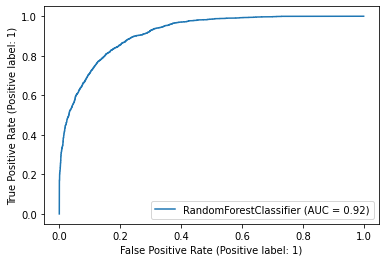

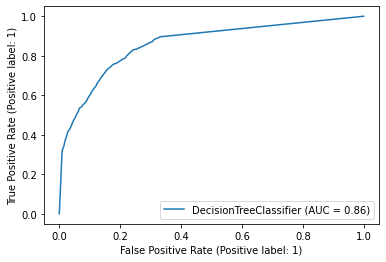

In [25]:
# Random forests
RocCurveDisplay.from_estimator(clf1, X_val, y_val)

# Trees
RocCurveDisplay.from_estimator(clf2, X_val, y_val)

### PRECISION - RECALL

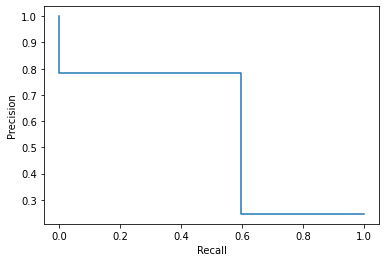

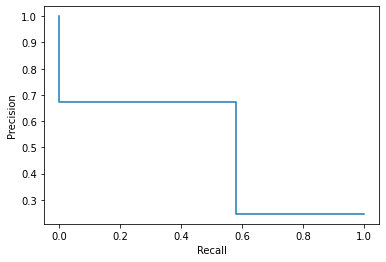

In [26]:
# Random forests

predictions1 = clf1.predict(X_val)
precision1, recall1, _ = precision_recall_curve(y_val,predictions1)
disp = PrecisionRecallDisplay(precision=precision1, recall=recall1)
disp.plot()

# Trees

predictions2 = clf2.predict(X_val)
precision2, recall2, _ = precision_recall_curve(y_val,predictions2)
disp = PrecisionRecallDisplay(precision=precision2, recall=recall2)
disp.plot()

# Gradient Boosting

class sklearn.ensemble.GradientBoostingClassifier(*, loss='deviance', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, init=None, random_state=None, max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False, validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)

In [205]:

categ3 = ["sex","target","workclass",	"marital-status",	"occupation", "relationship",	"race"]

le = LabelEncoder()
for col in categ3:
    dfg[col] = le.fit_transform(dfg[col])  
dfg = dfg.dropna()
dfg

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,target
0,39,5,77516,13,4,1,1,4,1,2174,0,40,0
1,50,4,83311,13,2,3,0,4,1,0,0,13,0
2,38,2,215646,9,0,4,1,4,1,0,0,40,0
3,53,2,234721,7,2,4,0,2,1,0,0,40,0
4,28,2,338409,13,2,3,5,2,0,0,0,40,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,2,257302,12,2,1,5,4,0,0,0,38,0
32557,40,2,154374,9,2,0,0,4,1,0,0,40,1
32558,58,2,151910,9,6,1,4,4,0,0,0,40,0
32559,22,2,201490,9,4,1,3,4,1,0,0,20,0


In [206]:
train_dfg, val_dfg = train_test_split(dfg, test_size=0.3, random_state=123)
print(train_dfg['target'].value_counts())
print(val_dfg['target'].value_counts())

y_traing = train_dfg['target']
y_valg = val_dfg['target']
X_traing = train_dfg.drop(labels=['target'],axis=1)
X_valg = val_dfg.drop(labels=['target'],axis=1)

from sklearn.ensemble import GradientBoostingClassifier
clf_g = GradientBoostingClassifier(n_estimators=200, subsample=0.6, learning_rate=0.05)
clf_g.fit(X_traing,y_traing)

0    16122
1     5380
Name: target, dtype: int64
0    6946
1    2270
Name: target, dtype: int64


GradientBoostingClassifier(learning_rate=0.05, n_estimators=200, subsample=0.6)

In [29]:
predictions_g = clf_g.predict_proba(X_valg)
np.savetxt("sample.txt", predictions_g, delimiter =", ")

In [30]:
print("Test")
y_predg = clf_g.predict(X_valg)
print(classification_report(y_valg,y_predg))
print("Train")
y_predtg = clf_g.predict(X_traing)
print(classification_report(y_traing,y_predtg))

Test
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      6946
           1       0.79      0.60      0.68      2270

    accuracy                           0.86      9216
   macro avg       0.83      0.77      0.80      9216
weighted avg       0.86      0.86      0.85      9216

Train
              precision    recall  f1-score   support

           0       0.88      0.95      0.91     16122
           1       0.79      0.61      0.69      5380

    accuracy                           0.86     21502
   macro avg       0.84      0.78      0.80     21502
weighted avg       0.86      0.86      0.86     21502



In [31]:
confusion_matrix(y_valg,y_predg)

array([[6576,  370],
       [ 906, 1364]])

In [32]:
y_probg = clf_g.predict_proba(X_valg)
y_pred_tg = y_probg[:,1]>0.7

confusion_matrix(y_valg,y_pred_tg)

array([[6814,  132],
       [1260, 1010]])

In [33]:
print(metrics.roc_auc_score(y_valg, y_probg[:,1]))
gb = metrics.roc_auc_score(y_valg, y_probg[:,1]) * 100

0.9182066247997454


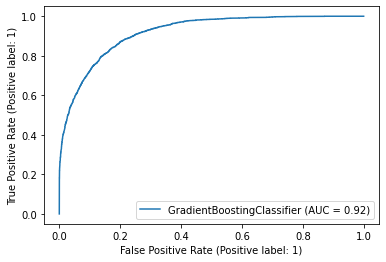

In [34]:
RocCurveDisplay.from_estimator(clf_g, X_valg, y_valg)

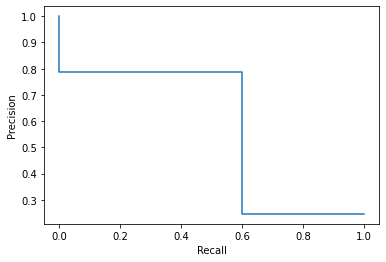

In [38]:
predictions_g = clf_g.predict(X_valg)
precision_g, recall_g, _ = precision_recall_curve(y_valg,predictions_g)
disp = PrecisionRecallDisplay(precision=precision_g, recall=recall_g)
disp.plot()

## HistGradientBoostingClassifier

class sklearn.ensemble.HistGradientBoostingClassifier(loss='auto', *, learning_rate=0.1, max_iter=100, max_leaf_nodes=31, max_depth=None, min_samples_leaf=20, l2_regularization=0.0, max_bins=255, categorical_features=None, monotonic_cst=None, warm_start=False, early_stopping='auto', scoring='loss', validation_fraction=0.1, n_iter_no_change=10, tol=1e-07, verbose=0, random_state=None)

In [39]:
X_traing.columns

Index(['age', 'workclass', 'fnlwgt', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week'],
      dtype='object')

In [40]:
from sklearn.ensemble import HistGradientBoostingClassifier
lista=[False,True,False,True,True,True,True,True,True,False,False,False]
clf_h = HistGradientBoostingClassifier(categorical_features=lista, loss='binary_crossentropy',
                                     max_iter=300,learning_rate=0.05)

In [41]:
clf_h.fit(X_traing,y_traing)

HistGradientBoostingClassifier(categorical_features=[False, True, False, True,
                                                     True, True, True, True,
                                                     True, False, False,
                                                     False],
                               learning_rate=0.05, loss='binary_crossentropy',
                               max_iter=300)

In [42]:
predictions_h = clf_h.predict_proba(X_valg)
np.savetxt("sample.txt", predictions_h, delimiter =", ")

In [43]:
print("Test")
y_predh = clf_h.predict(X_valg)
print(classification_report(y_valg,y_predh))
print("Train")
y_predth = clf_h.predict(X_traing)
print(classification_report(y_traing,y_predth))

Test
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      6946
           1       0.77      0.65      0.70      2270

    accuracy                           0.86      9216
   macro avg       0.83      0.79      0.81      9216
weighted avg       0.86      0.86      0.86      9216

Train
              precision    recall  f1-score   support

           0       0.90      0.95      0.93     16122
           1       0.82      0.70      0.75      5380

    accuracy                           0.89     21502
   macro avg       0.86      0.82      0.84     21502
weighted avg       0.88      0.89      0.88     21502



In [44]:
confusion_matrix(y_valg,y_predh)

array([[6500,  446],
       [ 801, 1469]])

In [45]:
y_probh = clf_h.predict_proba(X_valg)
y_pred_th = y_probh[:,1]>0.7

confusion_matrix(y_valg,y_pred_th)

array([[6833,  113],
       [1248, 1022]])

In [46]:
print(metrics.roc_auc_score(y_valg, y_probh[:,1]))
hgb = metrics.roc_auc_score(y_valg, y_probh[:,1]) * 100

0.9225013350313495


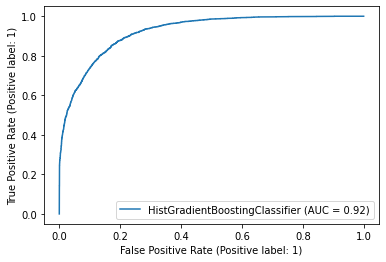

In [47]:
RocCurveDisplay.from_estimator(clf_h, X_valg, y_valg)

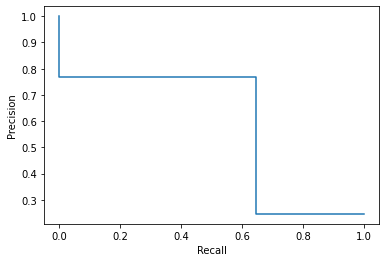

In [48]:
predictions_h = clf_h.predict(X_valg)
precision_h, recall_h, _ = precision_recall_curve(y_valg,predictions_h)
disp = PrecisionRecallDisplay(precision=precision_h, recall=recall_h)
disp.plot()

## SVM

In [207]:
from sklearn.utils import resample
XX_train , yy_train = resample(X_traing,y_traing,replace=False, n_samples=5000) 

In [208]:
from sklearn.svm  import  SVC
clf_s = SVC(kernel='poly',tol=0.0001,C=3)
clf_s.fit(XX_train,yy_train)

SVC(C=3, kernel='poly', tol=0.0001)

In [209]:
predictions_s = clf_s.predict(X_valg)
np.savetxt("sample.txt", predictions_s, delimiter =", ")

In [210]:
print("Test")
y_preds = clf_s.predict(X_valg)
print(classification_report(y_valg,y_preds))
print("Train")
y_predts = clf_s.predict(X_traing)
print(classification_report(y_traing,y_predts))

Test
              precision    recall  f1-score   support

           0       0.77      1.00      0.87      6946
           1       0.88      0.08      0.15      2270

    accuracy                           0.77      9216
   macro avg       0.83      0.54      0.51      9216
weighted avg       0.80      0.77      0.69      9216

Train
              precision    recall  f1-score   support

           0       0.77      1.00      0.87     16122
           1       0.91      0.09      0.16      5380

    accuracy                           0.77     21502
   macro avg       0.84      0.54      0.51     21502
weighted avg       0.80      0.77      0.69     21502



In [211]:
confusion_matrix(y_valg,y_preds)

array([[6921,   25],
       [2082,  188]])

In [212]:
y_probs = clf_s.predict(X_valg)
y_pred_ts = y_probs[:]>0.7

confusion_matrix(y_valg,y_pred_ts)

array([[6921,   25],
       [2082,  188]])

In [213]:
print(metrics.roc_auc_score(y_valg, y_probs[:]))
s = metrics.roc_auc_score(y_valg, y_probs[:]) * 100

0.5396100947396595


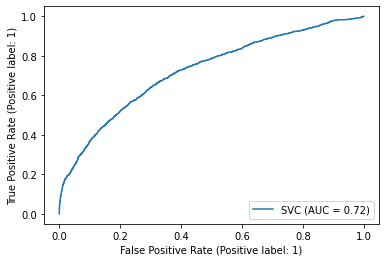

In [214]:
RocCurveDisplay.from_estimator(clf_s, X_valg, y_valg)

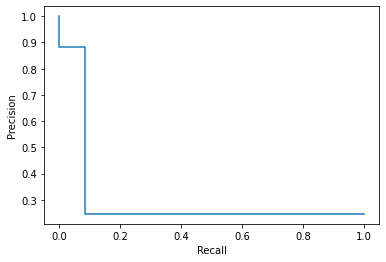

In [215]:
predictions_s = clf_s.predict(X_valg)
precision_s, recall_s, _ = precision_recall_curve(y_valg,predictions_s)
disp = PrecisionRecallDisplay(precision=precision_s, recall=recall_s)
disp.plot()

## LogisticRegression

In [216]:
from sklearn.linear_model import LogisticRegression
clf_r = LogisticRegression(penalty='none', max_iter=1000)
clf_r.fit(X_traing,y_traing)
predictions_r = clf_r.predict_proba(X_valg)
np.savetxt("sample.txt", predictions_r, delimiter =", ")

In [217]:
print("Test")
y_predr = clf_r.predict(X_valg)
print(classification_report(y_valg,y_predr))
print("Train")
y_predtr = clf_r.predict(X_traing)
print(classification_report(y_traing,y_predtr))

Test
              precision    recall  f1-score   support

           0       0.80      0.96      0.87      6946
           1       0.70      0.27      0.38      2270

    accuracy                           0.79      9216
   macro avg       0.75      0.61      0.63      9216
weighted avg       0.78      0.79      0.75      9216

Train
              precision    recall  f1-score   support

           0       0.80      0.96      0.87     16122
           1       0.72      0.28      0.40      5380

    accuracy                           0.79     21502
   macro avg       0.76      0.62      0.64     21502
weighted avg       0.78      0.79      0.75     21502



In [218]:
confusion_matrix(y_valg,y_predr)

array([[6686,  260],
       [1667,  603]])

In [219]:
y_probr = clf_r.predict_proba(X_valg)
y_pred_tr = y_probr[:,1]>0.7

confusion_matrix(y_valg,y_pred_tr)

array([[6915,   31],
       [1889,  381]])

In [220]:
print(metrics.roc_auc_score(y_valg, y_probr[:,1]))
lr = metrics.roc_auc_score(y_valg, y_probr[:,1]) * 100

0.5702837242871694


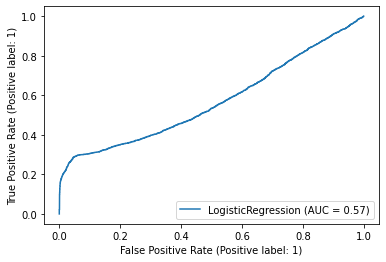

In [221]:
RocCurveDisplay.from_estimator(clf_r, X_valg, y_valg)

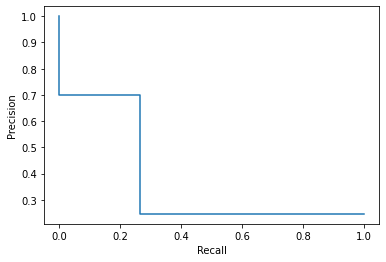

In [222]:
predictions_r = clf_r.predict(X_valg)
precision_r, recall_r, _ = precision_recall_curve(y_valg,predictions_r)
disp = PrecisionRecallDisplay(precision=precision_r, recall=recall_r)
disp.plot()

# **Part 2**
## feedforward neural network

In [453]:
df

,age,fnlwgt,education-num,sex,capital-gain,capital-loss,hours-per-week,target,work_Federal-gov,work_Local-gov,...,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White
0,39,77516,13,1,2174,0,40,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,50,83311,13,1,0,0,13,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,38,215646,9,1,0,0,40,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,53,234721,7,1,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,0,40,0,0,0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,0,0,0,38,0,0,0,...,0,0,0,0,1,0,0,0,0,1
32557,40,154374,9,1,0,0,40,1,0,0,...,0,0,0,0,0,0,0,0,0,1
32558,58,151910,9,0,0,0,40,0,0,0,...,0,0,0,1,0,0,0,0,0,1
32559,22,201490,9,1,0,0,20,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [454]:
train_df, val_df = train_test_split(df, test_size=0.3, random_state=123)
print(train_df['target'].value_counts())
print(val_df['target'].value_counts())

y_train = train_df['target']
y_val = val_df['target']
X_train = train_df.drop(labels=['target'],axis=1)
X_val = val_df.drop(labels=['target'],axis=1)

0    16122
1     5380
Name: target, dtype: int64
0    6946
1    2270
Name: target, dtype: int64


In [451]:
y_train

19428    0
5111     0
17651    0
1197     0
21574    0
        ..
30335    0
18785    0
29696    1
16665    0
21160    0
Name: target, Length: 21502, dtype: int64

In [483]:
yy_train = to_categorical(y_train, num_classes=2)
yy_val = to_categorical(y_val, num_classes=2)

Model: "model_51"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_55 (InputLayer)          [(None, 37)]         0           []                               
                                                                                                  
 dense_480 (Dense)              (None, 512)          19456       ['input_55[0][0]']               
                                                                                                  
 dense_481 (Dense)              (None, 128)          65664       ['dense_480[0][0]']              
                                                                                                  
 dense_482 (Dense)              (None, 128)          65664       ['dense_480[0][0]']              
                                                                                           

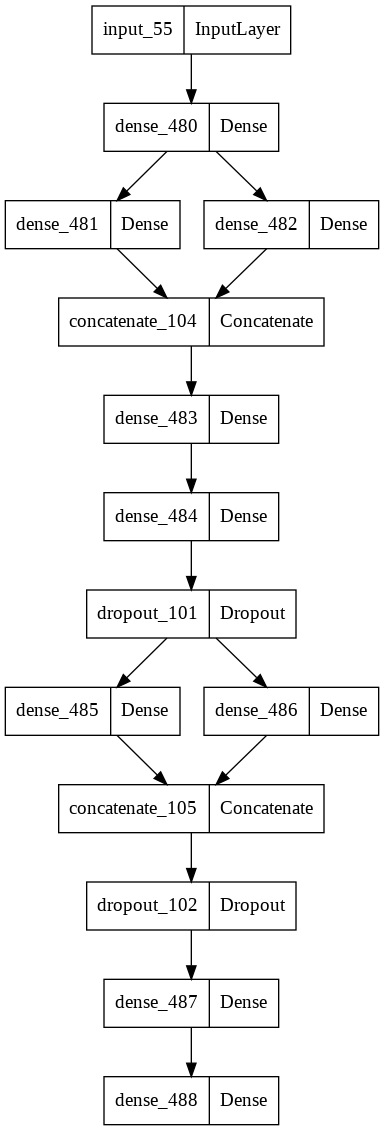

In [484]:
input  = Input(shape=(37,))
x  = Dense(512, activation='relu')(input)
x1  = Dense(128, activation='relu')(x)
x2  = Dense(128, activation='relu')(x)
x = Concatenate()([x1,x2])
x  = Dense(64, activation='relu')(x)
x  = Dense(64, activation='relu')(x)
x  = Dropout(0.3)(x)
x1  = Dense(32, activation='relu')(x)
x2  = Dense(32, activation='relu')(x)
x = Concatenate()([x1,x2])
x  = Dropout(0.3)(x)
x  = Dense(64, activation='relu')(x)
output = Dense(2, activation='softmax')(x)
model = Model(input, output)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
plot_model(model)

In [485]:
model.fit(X_train, yy_train, epochs=5, validation_data=(X_val, yy_val), batch_size=32)

Epoch 1/5
672/672 [==============================] - 4s 5ms/step - loss: 32.0791 - accuracy: 0.7370 - val_loss: 0.5524 - val_accuracy: 0.7616
Epoch 2/5
672/672 [==============================] - 3s 5ms/step - loss: 0.5839 - accuracy: 0.7514 - val_loss: 0.5543 - val_accuracy: 0.7565
Epoch 3/5
672/672 [==============================] - 3s 5ms/step - loss: 0.5806 - accuracy: 0.7516 - val_loss: 0.5577 - val_accuracy: 0.7541
Epoch 4/5
672/672 [==============================] - 3s 5ms/step - loss: 0.5621 - accuracy: 0.7503 - val_loss: 0.5576 - val_accuracy: 0.7541
Epoch 5/5
672/672 [==============================] - 3s 5ms/step - loss: 0.5621 - accuracy: 0.7503 - val_loss: 0.5577 - val_accuracy: 0.7541


In [486]:
from sklearn.metrics import confusion_matrix 
fnn = model.evaluate(X_val, yy_val)
fnn

288/288 [==============================] - 1s 2ms/step - loss: 0.5577 - accuracy: 0.7541


[0.5576909184455872, 0.7541232705116272]

In [487]:
yyy = model.predict(X_val)
yyy

array([[0.7495277, 0.2504723],
       [0.7495277, 0.2504723],
       [0.7495277, 0.2504723],
       ...,
       [0.7495277, 0.2504723],
       [0.7495277, 0.2504723],
       [0.7495277, 0.2504723]], dtype=float32)

In [488]:
yyt = np.argmax(yyy, axis= 1)
yyt

array([0, 0, 0, ..., 0, 0, 0])

In [489]:
confusion_matrix(y_val, yyt)

array([[6946,    0],
       [2266,    4]])

# ***All Models***

In [490]:
results = pd.DataFrame({
    'Model': ['Random Forest Classifier',  'Decision Tree Classifier', 'Gradient Boosting Classifier',
              'Hist Gradient Boosting Classifier', 'SVM', 'Logistic Regression', 'Feedforward Neural Network'],
    'Accuracy': [rf, t, gb, hgb, s, lr, fnn[1]*100]})

results

,Model,Accuracy
0,Random Forest Classifier,91.519396
1,Decision Tree Classifier,86.014941
2,Gradient Boosting Classifier,91.820662
3,Hist Gradient Boosting Classifier,92.250134
4,SVM,53.961009
5,Logistic Regression,57.028372
6,Feedforward Neural Network,75.412327
